In [13]:
#import needed libs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates

In [14]:
#data_set.  Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [15]:
# Converting 'Total_Amt' column to numpy array and reshaping it
data = df['Total_Amt'].values.reshape(-1, 1)

# Scaling the values to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [19]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 30.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 41.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.7 MB/s eta 0:00:00a 0:00:01


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [32]:

# Assuming 'df' is your DataFrame and 'Total_Amt' is the column you want to forecast
data = df['Total_Amt'].values

In [34]:
# Normalize the data between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))


In [35]:
# Split the data
train_size = int(len(data) * 0.8)
train, test = data[:train_size, :], data[train_size:, :]

In [36]:

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [37]:
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

In [38]:

# Reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

In [39]:

# Build the model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [40]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
790/790 [==============================] - 10s 11ms/step - loss: 0.0597
Epoch 2/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0589
Epoch 3/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0588
Epoch 4/20
790/790 [==============================] - 9s 11ms/step - loss: 0.0587
Epoch 5/20
790/790 [==============================] - 9s 11ms/step - loss: 0.0587
Epoch 6/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0586
Epoch 7/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0586
Epoch 8/20
790/790 [==============================] - 10s 12ms/step - loss: 0.0586
Epoch 9/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0586
Epoch 10/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0585
Epoch 11/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0586
Epoch 12/20
790/790 [==============================] - 7s 9ms/step - loss: 0.0586
Epoch 13/20
790/790

In [41]:
# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

123/123 [==============================] - 1s 11ms/step


In [42]:
# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

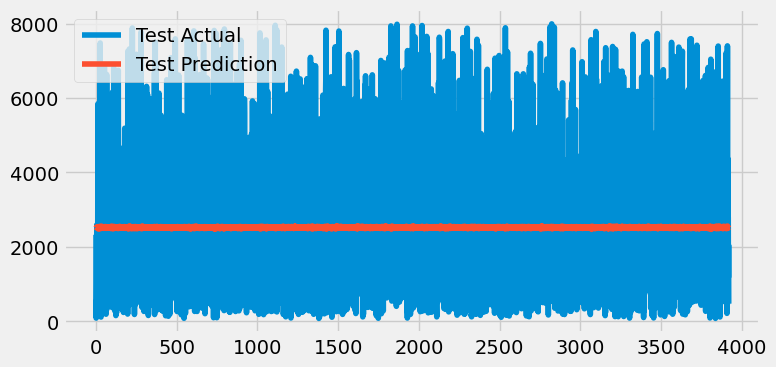

In [43]:
# Plotting the data
plt.figure(figsize=(8,4))
plt.plot(y_test[0], label='Test Actual')
plt.plot(test_predict[:,0], label='Test Prediction')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
trainScore_MAE = mean_absolute_error(y_train[0], train_predict[:,0])
print('Train Score: %.2f MAE' % (trainScore_MAE))
testScore_MAE = mean_absolute_error(y_test[0], test_predict[:,0])
print('Test Score: %.2f MAE' % (testScore_MAE))


Train Score: 1917.97 RMSE
Test Score: 1882.70 RMSE
Train Score: 1573.71 MAE
Test Score: 1551.72 MAE


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [60]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Replace 'Total_Amt' with your actual column name
X, y = split_sequence(df['Total_Amt'].values, look_back, n_steps_out)

# The remaining code goes here...


In [62]:
X, y = split_sequence(df['Total_Amt'].values, look_back, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [63]:
# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# Model training
model.fit(X_train, y_train, epochs=20, verbose=0)

In [65]:

# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)



124/124 [==============================] - 0s 2ms/step


In [69]:
# Invert predictions
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df['Total_Amt'].values.reshape(-1, 1))
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train.reshape(y_train.shape[0], y_train.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))



In [70]:
# Calculate RMSE and MAE
trainScore_RMSE = np.sqrt(mean_squared_error(y_train[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
trainScore_MAE = mean_absolute_error(y_train[:,0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore_MAE))

testScore_RMSE = np.sqrt(mean_squared_error(y_test[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_RMSE))
testScore_MAE = mean_absolute_error(y_test[:,0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 29038271277284.32 RMSE
Train Score: 26089198451229.53 MAE
Test Score: 196319514866.12 RMSE
Test Score: 156483702771.46 MAE


In [76]:
# Create a separate index for predictions
index_for_predictions = df.index[look_back:-look_back]


In [74]:
# Create a separate index for predictions
index_for_predictions = df.index[look_back:-look_back]



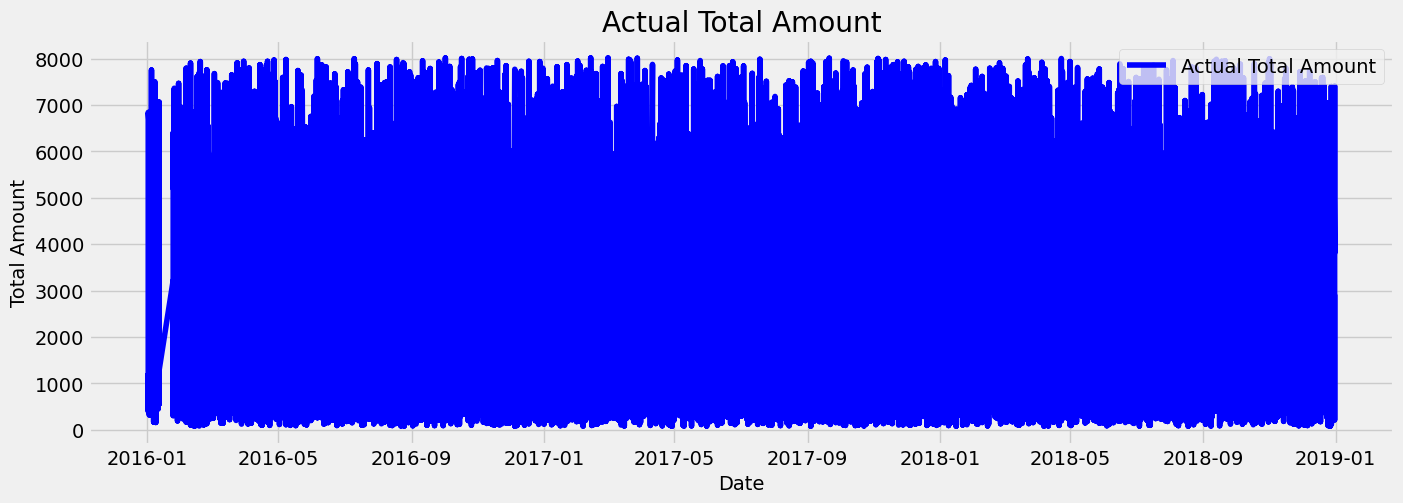

In [77]:
# Plot actual sales
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Total_Amt'], color = 'blue', label = 'Actual Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual Total Amount')
plt.legend()
plt.show()

In [79]:
# Adjust the date range for the predictions
train_date_range = df.index[look_back:-look_back][:len(trainPredict)]
test_date_range = df.index[look_back:-look_back][len(trainPredict):]

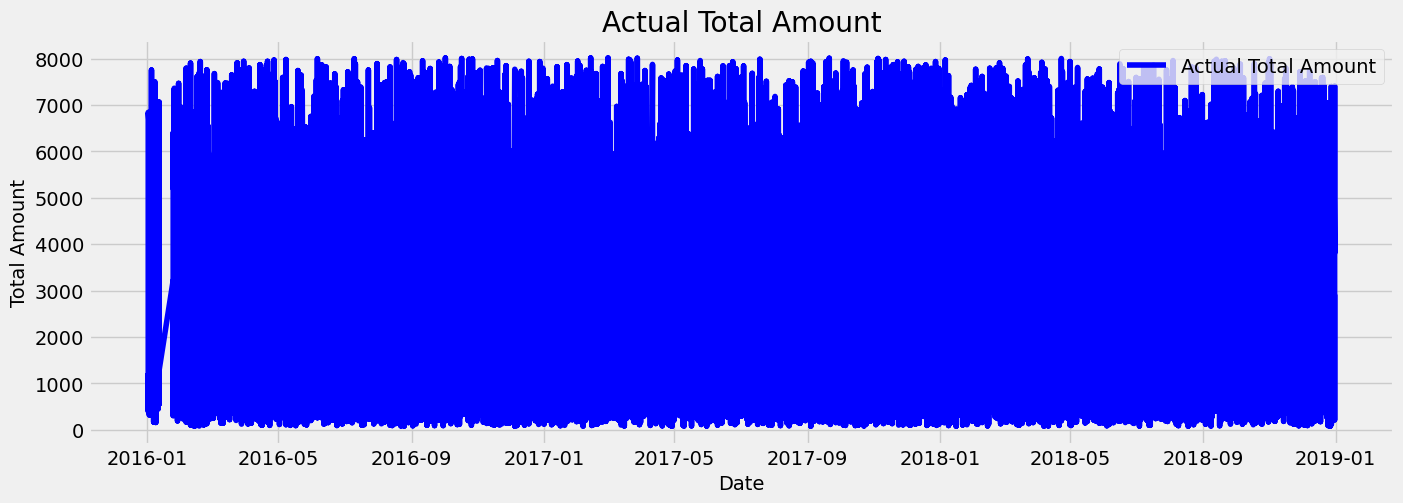

ValueError: x and y must have same first dimension, but have shapes (3920,) and (3950,)

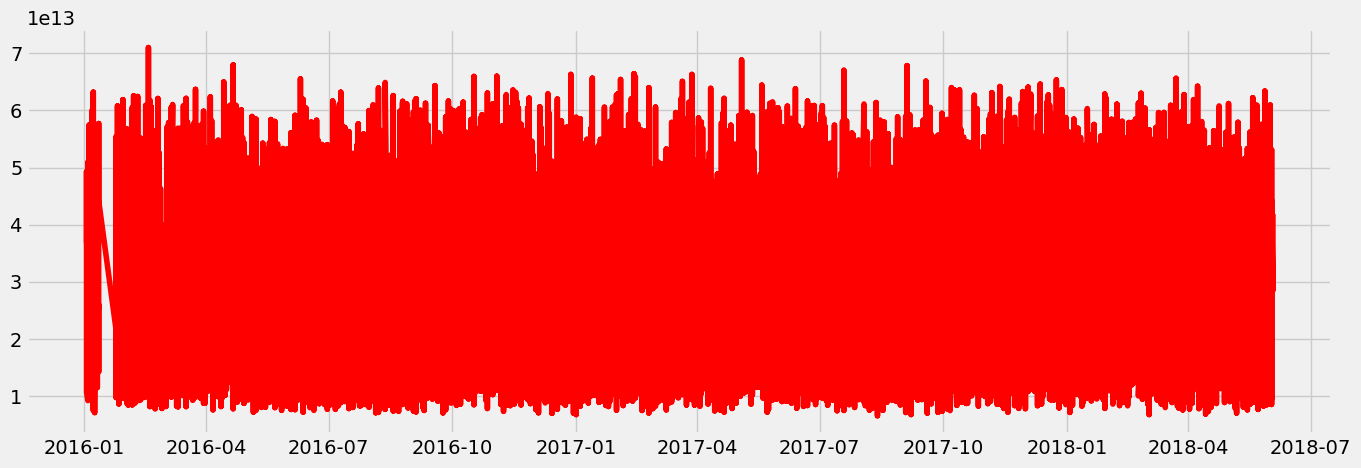

In [81]:
# Ensure the predictions are 1D
trainPredict = trainPredict.reshape(-1)
testPredict = testPredict.reshape(-1)

# Adjust the lengths of the date ranges
train_date_range = df.index[look_back:len(trainPredict)+look_back]
test_date_range = df.index[len(trainPredict)+(2*look_back):len(trainPredict)+len(testPredict)+(2*look_back)]

# Plot actual sales
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Total_Amt'], color = 'blue', label = 'Actual Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual Total Amount')
plt.legend()
plt.show()

# Plot predicted sales
plt.figure(figsize=(15, 5))
plt.plot(train_date_range, trainPredict, color = 'red', label = 'Predicted Total Amount - Train')
plt.plot(test_date_range, testPredict, color = 'orange', label = 'Predicted Total Amount - Test')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Predicted Total Amount')
plt.legend()
plt.show()


In [82]:
# Convert daily data to weekly data for actual sales
weekly_sales = df['Total_Amt'].resample('W').sum()

# Create weekly date ranges for predictions
weekly_train_date_range = pd.date_range(start=train_date_range[0], end=train_date_range[-1], freq='W')
weekly_test_date_range = pd.date_range(start=test_date_range[0], end=test_date_range[-1], freq='W')

# Convert daily predictions to weekly predictions
weekly_trainPredict = pd.Series(trainPredict, index=train_date_range).resample('W').sum().values
weekly_testPredict = pd.Series(testPredict, index=test_date_range).resample('W').sum().values

# Plot actual weekly sales
plt.figure(figsize=(15, 5))
plt.plot(weekly_sales.index, weekly_sales, color = 'blue', label = 'Actual Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual Total Amount - Weekly')
plt.legend()
plt.show()

# Plot predicted weekly sales
plt.figure(figsize=(15, 5))
plt.plot(weekly_train_date_range, weekly_trainPredict, color = 'red', label = 'Predicted Total Amount - Train')
plt.plot(weekly_test_date_range, weekly_testPredict, color = 'orange', label = 'Predicted Total Amount - Test')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Predicted Total Amount - Weekly')
plt.legend()
plt.show()


ValueError: Length of values (3950) does not match length of index (3920)